### ÂÆûÈ™å2_ÂâçÈ¶àÁ•ûÁªèÁΩëÁªúÂÆûÈ™å Â§öÂàÜÁ±ª‰ªªÂä°

In [18]:
import torch
import torchvision
import torch.utils.data as Data
import torch.optim as optim
import numpy as np
from torch import nn
from typing import Tuple
from matplotlib import pyplot as plt
import torchvision.transforms as transforms


def train_epoch(data_loader: Data.DataLoader, net: nn.Module,
                loss_func, optimizer: torch.optim.Optimizer,
                device='cpu'):
    """
    ËÆ≠ÁªÉËø≠‰ª£‰∏ÄÊ¨°
    :param data_loader: ÁîüÊàêÂô® (x, y)
    :param net:         Ê®°Âûã
    :param loss_func:   ÊçüÂ§±ÂáΩÊï∞
    :param optimizer:   ‰ºòÂåñÂô®
    :param device:      ËÆæÂ§á
    :return:    loss, acc
    """
    net.train()
    train_batch_num = len(data_loader)

    # ‰∏ÄÊ¨°Ëø≠‰ª£‰∏≠ÁöÑ Loss„ÄÅÊ≠£Á°ÆÊ†∑Êú¨Êï∞„ÄÅÊÄªÊ†∑Êú¨Êï∞
    total_loss, correct, sample_num = 0, 0, 0

    for batch_num, (x, y_true) in enumerate(data_loader):

        # Â∞ÜÊï∞ÊçÆÊîæÂÖ•ÊåáÂÆöÁöÑËÆæÂ§á
        x = x.to(device).float()
        y_true = y_true.to(device).long()

        # ËÆ°ÁÆóÊçüÂ§±
        y_hat: torch.Tensor = net(x)
        loss = loss_func(y_hat, y_true)

        # ÂèñÊ¶ÇÁéáÊúÄÂ§ßÁöÑÁ±ªÂà´Á¥¢Âºï
        y_true: torch.Tensor = y_true.view(-1)
        y_hat = y_hat.argmax(dim=1)

        # ÂèçÂêë‰º†Êí≠
        optimizer.zero_grad() #Ê∏ÖÁ©∫Ê¢ØÂ∫¶
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (y_true == y_hat).float().sum().item()
        sample_num += len(y_true)

    loss = total_loss / train_batch_num
    acc = correct / sample_num

    return loss, acc


def test_epoch(data_loader: Data.DataLoader,
               net: nn.Module, loss_func, device='cpu'):
    """
    ÊµãËØïÂáΩÊï∞Ëø≠‰ª£‰∏ÄÊ¨°
    :param data_loader: ÁîüÊàêÂô® (x, y)
    :param net:         Ê®°Âûã
    :param loss_func:   ÊçüÂ§±ÂáΩÊï∞
    :param device:      ËÆæÂ§á
    :return:    loss, acc
    """
    net.eval()
    train_batch_num = len(data_loader)

    # ‰∏ÄÊ¨°Ëø≠‰ª£‰∏≠ÁöÑ Loss„ÄÅÊ≠£Á°ÆÊ†∑Êú¨Êï∞„ÄÅÊÄªÊ†∑Êú¨Êï∞
    total_loss, correct, sample_num = 0, 0, 0

    with torch.no_grad():

        for batch_num, (x, y_true) in enumerate(data_loader):

            # Â∞ÜÊï∞ÊçÆÊîæÂÖ•ÊåáÂÆöÁöÑËÆæÂ§á
            x = x.to(device).float()
            y_true = y_true.to(device).long()

            # ËÆ°ÁÆóÊçüÂ§±
            y_hat: torch.Tensor = net(x)
            loss = loss_func(y_hat, y_true)

            # ÂèñÊ¶ÇÁéáÊúÄÂ§ßÁöÑÁ±ªÂà´Á¥¢Âºï
            y_true: torch.Tensor = y_true.view(-1)
            y_hat = y_hat.argmax(dim=1)

            total_loss += loss.item()
            correct += (y_true == y_hat).float().sum().item()
            sample_num += len(y_true)

    loss = total_loss / train_batch_num
    acc = correct / sample_num

    return loss, acc


def plot_loss_accuracy(train_loss_list, train_acc_list,
                       test_loss_list, test_acc_list, info=''):
    """
    ÁªòÂà∂ ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÊ≠£Á°ÆÁéá„ÄÅÊçüÂ§±ÂÄº ÁöÑÂõæÂΩ¢
    """
    x = np.linspace(0, len(train_loss_list), len(train_loss_list))
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 6)
    if info:
        info = info + ' '

    ax1.plot(x, train_loss_list, 'b-', label="train_loss", lw=1)
    ax1.plot(x, test_loss_list, 'r-', label="test_loss", lw=1)
    ax1.set_title(info + 'Loss')
    ax1.legend(loc='best', frameon=False)
    ax1.set_xlabel("epoch")
    ax1.set_ylabel("Loss")

    ax2.plot(x, train_acc_list, 'b-', label="train_accuracy", lw=1)
    ax2.plot(x, test_acc_list, 'r-', label="test_accuracy", lw=1)
    ax2.set_title(info + 'Accuracy')
    ax2.legend(loc='best', frameon=False)
    ax2.set_xlabel("epoch")
    ax2.set_ylabel("Accuracy")

    plt.show()


def plot_by_dict(metrics: dict, shape: Tuple[int, int]):
    """
    ÁªòÂà∂ÂõæÂΩ¢ {ÊåáÊ†á: {ÂèÇÊï∞ÂÄºÂêç1: [], ÂèÇÊï∞ÂÄºÂêç2: []}}
    """
    fig, axes = plt.subplots(shape[0], shape[1])
    axes = list(np.array(axes).ravel())
    fig.set_size_inches(10*shape[0], 6*shape[1])

    colors = ['b', 'r', 'y', 'c', 'k', 'g', 'w', 'm']
    for ax_no, title in enumerate(metrics.keys()):
        ax = axes[ax_no]
        for i, (key, values) in enumerate(metrics.get(title, {}).items()):
            x = np.linspace(0, len(values), len(values))
            ax.plot(x, values, colors[i], label=key, lw=1)
            ax.set_title(title)
            ax.legend(loc='best', frameon=False)
            ax.set_xlabel("epoch")
            ax.set_ylabel(title.lower().split(' ')[-1])

    plt.show()


#### MNISTÊâãÂÜô‰ΩìÊï∞ÊçÆÈõÜ‰ªãÁªç
+ ËØ•Êï∞ÊçÆÈõÜÂåÖÂê´60,000‰∏™Áî®‰∫éËÆ≠ÁªÉÁöÑÂõæÂÉèÊ†∑Êú¨Âíå10,000‰∏™Áî®‰∫éÊµãËØïÁöÑÂõæÂÉèÊ†∑Êú¨„ÄÇ
+ ÂõæÂÉèÊòØÂõ∫ÂÆöÂ§ßÂ∞è(28x28ÂÉèÁ¥†)ÔºåÂÖ∂ÂÄº‰∏∫0Âà∞1„ÄÇ ‰∏∫ÊØè‰∏™ÂõæÂÉèÈÉΩË¢´Âπ≥Â±ïÂπ∂ËΩ¨Êç¢‰∏∫784(28 * 28)‰∏™ÁâπÂæÅÁöÑ‰∏ÄÁª¥numpyÊï∞ÁªÑ„ÄÇ

In [2]:
# dataset_dir = '/Users/zhengchubin/PycharmProjects/learn/data/'
dataset_dir = '/root/zhengchubin/data/'

# ‰∏ãËΩΩ‰∏ç‰∫ÜÊï∞ÊçÆÈõÜ
# mnist_train = torchvision.datasets.FashionMNIST(root=dataset_dir, train=True, download=True, transform=transforms.ToTensor())
# mnist_test = torchvision.datasets.FashionMNIST(root=dataset_dir, train=False, download=True, transform=transforms.ToTensor())

# ÊâãÂä®‰∏ãËΩΩÊï∞ÊçÆÈõÜÂπ∂ËØªÂèñ
mnist_train = torchvision.datasets.FashionMNIST(root=dataset_dir, train=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root=dataset_dir, train=False, transform=transforms.ToTensor())

mnist_train, mnist_train.data.shape, mnist_train.targets.shape

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: /root/zhengchubin/data/
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 torch.Size([60000, 28, 28]),
 torch.Size([60000]))

#### ÊâãÂä®ÂÆûÁé∞ÂâçÈ¶àÁ•ûÁªèÁΩëÁªú
ÂàÜÊûêÂÆûÈ™åÁªìÊûúÂπ∂ÁªòÂà∂ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁöÑlossÊõ≤Á∫ø

epoch 0, train_loss 2.150594, test_loss 1.865519, train_acc 0.407050, test_acc 0.479200
epoch 1, train_loss 1.516615, test_loss 1.261692, train_acc 0.574417, test_acc 0.601500
epoch 2, train_loss 1.108952, test_loss 1.004578, train_acc 0.641333, test_acc 0.642700
epoch 3, train_loss 0.927744, test_loss 0.883860, train_acc 0.666750, test_acc 0.663300
epoch 4, train_loss 0.835309, test_loss 0.814375, train_acc 0.687767, test_acc 0.686900
epoch 5, train_loss 0.778121, test_loss 0.769595, train_acc 0.710817, test_acc 0.702100
epoch 6, train_loss 0.735373, test_loss 0.730435, train_acc 0.734717, test_acc 0.723800
epoch 7, train_loss 0.701451, test_loss 0.700659, train_acc 0.751083, test_acc 0.745100
epoch 8, train_loss 0.672057, test_loss 0.671529, train_acc 0.765117, test_acc 0.758700
epoch 9, train_loss 0.646436, test_loss 0.650121, train_acc 0.776883, test_acc 0.767400
epoch 10, train_loss 0.624888, test_loss 0.630073, train_acc 0.787033, test_acc 0.778000
epoch 11, train_loss 0.605206, 

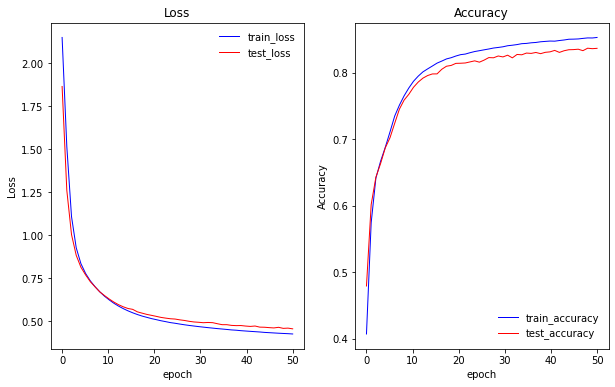

In [4]:
def sgd(lr, *params):
    """
    ‰ºòÂåñÂô®-Ê¢ØÂ∫¶‰∏ãÈôç
    :param lr:          Â≠¶‰π†Áéá
    :param params:      ÂèÇÊï∞ÂàóË°®
    :return:
    """
    for param in params:
        # Ê≥®ÊÑèËøôÈáåÊõ¥ÊîπparamÊó∂Áî®ÁöÑparam.data
        param.data -= lr * param.grad

def softmax(z: torch.Tensor):
    """
    ÊøÄÊ¥ªÂáΩÊï∞
    z = w^T * x+ b: [batch_size, ],
    :return [batch_size, num_classes]
    """
    exp_ = torch.exp(z)
    exp_sum = exp_.sum(dim=1, keepdim=True)
    return exp_ / exp_sum

def cross_entropy(y_hat: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
    """
    ÊçüÂ§±ÂáΩÊï∞-‰∫§ÂèâÁÜµ
    :param y_hat(one_hot):   È¢ÑÊµãÂÄº (batch_size, class_num)
    :param y_true:           ÁúüÂÄº  (batch_size)
    :return:
    """
    return -torch.log(y_hat.gather(dim=1, index=y_true.view(-1, 1))) / y_hat.shape[0]


def relu(x: torch.Tensor):
    """
    Á∫øÊÄßÂçïÂÖÉ
    :param x:
    :param gamma:
    :return:
    """
    return torch.where(x >= 0, x, torch.zeros(x.size()))

def neural_net(x: torch.Tensor, *params) -> torch.Tensor:
    """
    ÂâçÈ¶àÁ•ûÁªèÁΩëÁªú
    :param x:       ÁâπÂæÅ
    :param params:  Ê®°ÂûãÂèÇÊï∞
    :return:
    """
    w1, b1, w2, b2 = params
    # hidden = tanh(torch.mm(x, w1) + b1)
    # hidden = leak_relu(torch.mm(x, w1) + b1)
    hidden = relu(torch.matmul(x, w1) + b1)
    return softmax(torch.matmul(hidden, w2) + b2)


def evaluate_loss_acc(data_iter, net, loss_fn, *params):
    """
    ËøîÂõûÊµãËØïÈõÜÁöÑloss
    :return:
    """
    test_l_sum, acc_sum, num_batch, n = 0.0, 0.0, 0, 0
    for x, y_true in data_iter:

        x = x.view(x.shape[0], -1)
        y_hat = net(x, *params)

        test_l_sum += loss_fn(y_hat, y_true).sum()

        y_hat = y_hat.argmax(dim=1)
        acc_sum += (y_hat == y_true).float().sum().item()

        num_batch += 1
        n += y_true.shape[0]

    return test_l_sum/num_batch, acc_sum/n


# ÂèÇÊï∞ÈÖçÁΩÆ
num_inputs = 28 * 28
num_hiddens = 256
num_outputs = 10

batch_size = 256
num_epochs = 50
lr = 0.01
net = neural_net
loss = cross_entropy

# Ê®°ÂûãËÆ≠ÁªÉ w = [w_0, ..., w_n]
w1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)),
                  dtype=torch.float32)
b1 = torch.zeros(num_hiddens, dtype=torch.float32)
w2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)),
                  dtype=torch.float32)
b2 = torch.zeros(num_outputs, dtype=torch.float32)

params = (w1, b1, w2, b2)
for param in params:
    param.requires_grad_(requires_grad=True)

iter_train = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
iter_test = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
for epoch in range(num_epochs):

    # ‰∏ÄÊâπÊ¨°ÁöÑËÆ≠ÁªÉÊï∞ÊçÆ
    train_l_sum, train_acc_sum, num_batch, n = 0.0, 0.0, 0, 0
    for X, y_true in iter_train:

        # Ê®°ÂûãÈ¢ÑÊµãÂÄº
        X = X.view(-1, num_inputs)
        y_hat:torch.Tensor = net(X, *params)

        # ÊçüÂ§±ÂÄº
        l = loss(y_hat, y_true).sum()

        # ÂèçÂêë‰º†Êí≠
        l.backward()

        # ÈöèÊú∫Ê¢ØÂ∫¶‰∏ãÈôç
        sgd(lr, *params)

        # Ê¢ØÂ∫¶ÁΩÆÈõ∂
        for param in params:
            param.grad.data.zero_()

        y_hat = y_hat.argmax(dim=1)
        train_acc_sum += (y_hat == y_true).float().sum().item()
        train_l_sum += l

        num_batch += 1
        n += y_true.shape[0]

    train_l = train_l_sum / num_batch
    train_acc = train_acc_sum / n
    test_l, test_acc = evaluate_loss_acc(iter_test, net, loss, *params)

    train_loss.append(train_l.detach().numpy())
    test_loss.append(test_l.detach().numpy())
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    print('epoch %d, train_loss %f, test_loss %f, train_acc %f, test_acc %f'
          % (epoch+1, train_l, test_l, train_acc, test_acc))

plot_loss_accuracy(train_loss, train_accuracy, test_loss, test_accuracy)


#### torch.nnÂÆûÁé∞ÂâçÈ¶àÁ•ûÁªèÁΩëÁªú
ÂàÜÊûêÂÆûÈ™åÁªìÊûúÂπ∂ÁªòÂà∂ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁöÑlossÊõ≤Á∫ø

In [23]:
class FlattenLayaer(nn.Module):
    """ Â±ïÂºÄ """
    def __init__(self):
        super(FlattenLayaer, self).__init__()

    def forward(self, x):
        return x.view(x.shape[0], -1)


class TorchNeuron(nn.Module):
    def __init__(self, input_size, hidden_size, output_size,
                 activation=nn.ReLU, num_layers=1, drop_out_rate=0):
        super(TorchNeuron, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        self.activation = activation
        self.drop_out_rate = drop_out_rate

        self.linear = nn.Sequential(*self.create_linear_layers())

        for param in self.linear.parameters():
            nn.init.normal_(param, std=0.01)

    def create_linear_layers(self) -> Tuple[nn.Module]:
        """
        ÂàõÂª∫Â±Ç
        :return:
        """
        modules = [
            FlattenLayaer(),
            nn.Linear(self.input_size, self.hidden_size),
            self.activation(),
            nn.Dropout(self.drop_out_rate),
        ]
        for i in range(self.num_layers - 1):
            modules.append(nn.Linear(self.hidden_size, self.hidden_size))
            modules.append(self.activation())
            modules.append(nn.Dropout(self.drop_out_rate))
        modules.append(nn.Linear(self.hidden_size, self.output_size))
        return tuple(modules)

    def forward(self, x):
        return self.linear(x)

epoch 1, train_loss 2.147905, test_loss 1.859626, train_acc 0.295350, test_acc 0.474300
epoch 2, train_loss 1.518830, test_loss 1.269429, train_acc 0.575583, test_acc 0.610700
epoch 3, train_loss 1.115121, test_loss 1.019276, train_acc 0.643100, test_acc 0.647200
epoch 4, train_loss 0.931938, test_loss 0.888740, train_acc 0.671117, test_acc 0.666000
epoch 5, train_loss 0.836167, test_loss 0.822750, train_acc 0.692017, test_acc 0.690200
epoch 6, train_loss 0.776788, test_loss 0.764691, train_acc 0.715617, test_acc 0.713200
epoch 7, train_loss 0.733509, test_loss 0.744313, train_acc 0.737200, test_acc 0.736800
epoch 8, train_loss 0.698171, test_loss 0.699897, train_acc 0.753133, test_acc 0.749000
epoch 9, train_loss 0.669169, test_loss 0.676027, train_acc 0.765700, test_acc 0.762000
epoch 10, train_loss 0.643758, test_loss 0.658022, train_acc 0.778100, test_acc 0.773300
epoch 11, train_loss 0.621528, test_loss 0.633060, train_acc 0.786667, test_acc 0.779200
epoch 12, train_loss 0.602755,

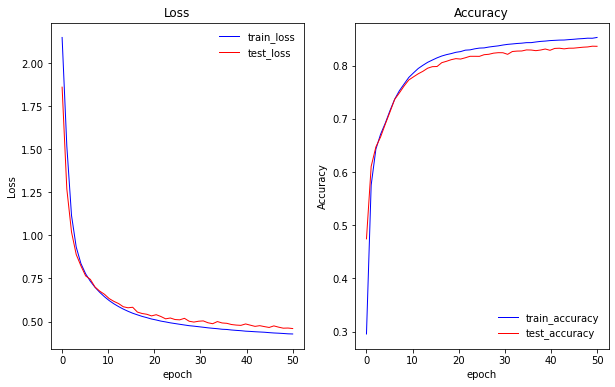

In [21]:
# ÂèÇÊï∞ÈÖçÁΩÆ
device = 'cpu'
input_size = 28 * 28
hidden_size = 256
output_size = 10

batch_size = 256
num_epochs = 50
lr = 0.01

net = TorchNeuron(input_size, hidden_size, output_size)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)

train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []

for epoch in range(num_epochs):
    train_data_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
    test_data_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=True)

    train_loss, train_acc = train_epoch(data_loader=train_data_loader, net=net,
                                        loss_func=loss_func, optimizer=optimizer, device=device)
    test_loss, test_acc = test_epoch(data_loader=test_data_loader, net=net,
                                     loss_func=loss_func, device=device)

    print('epoch %d, train_loss %f, test_loss %f, train_acc %f, test_acc %f'
          % (epoch+1, train_loss, test_loss, train_acc, test_acc))

    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)

plot_loss_accuracy(train_loss_list, train_acc_list, test_loss_list, test_acc_list)


#### ÂØπÊØîËØïÈ™å

##### ÊøÄÊ¥ªÂáΩÊï∞
Âú®Â§öÂàÜÁ±ªÂÆûÈ™åÁöÑÂü∫Á°Ä‰∏ä‰ΩøÁî®Ëá≥Â∞ë‰∏âÁßç‰∏çÂêåÁöÑÊøÄÊ¥ªÂáΩÊï∞ÔºåÂØπÊØî‰ΩøÁî®‰∏çÂêåÊøÄÊ¥ªÂáΩÊï∞ÁöÑÂÆûÈ™åÁªìÊûú

lr=0.01 epoch 1, train_loss 0.528044, test_loss 0.460460, train_acc 0.807550, test_acc 0.828000
lr=0.01 epoch 2, train_loss 0.380905, test_loss 0.403512, train_acc 0.860233, test_acc 0.857300
lr=0.01 epoch 3, train_loss 0.345915, test_loss 0.384809, train_acc 0.872617, test_acc 0.861300
lr=0.01 epoch 4, train_loss 0.327341, test_loss 0.419251, train_acc 0.879117, test_acc 0.854600
lr=0.01 epoch 5, train_loss 0.315523, test_loss 0.396689, train_acc 0.882867, test_acc 0.856900
lr=0.01 epoch 6, train_loss 0.304076, test_loss 0.364707, train_acc 0.887617, test_acc 0.867600
lr=0.01 epoch 7, train_loss 0.295543, test_loss 0.362988, train_acc 0.890467, test_acc 0.872200
lr=0.01 epoch 8, train_loss 0.286296, test_loss 0.377438, train_acc 0.894033, test_acc 0.867100
lr=0.01 epoch 9, train_loss 0.281638, test_loss 0.384687, train_acc 0.895217, test_acc 0.871600
lr=0.01 epoch 10, train_loss 0.272300, test_loss 0.411203, train_acc 0.899533, test_acc 0.868400
lr=0.01 epoch 11, train_loss 0.271214, 

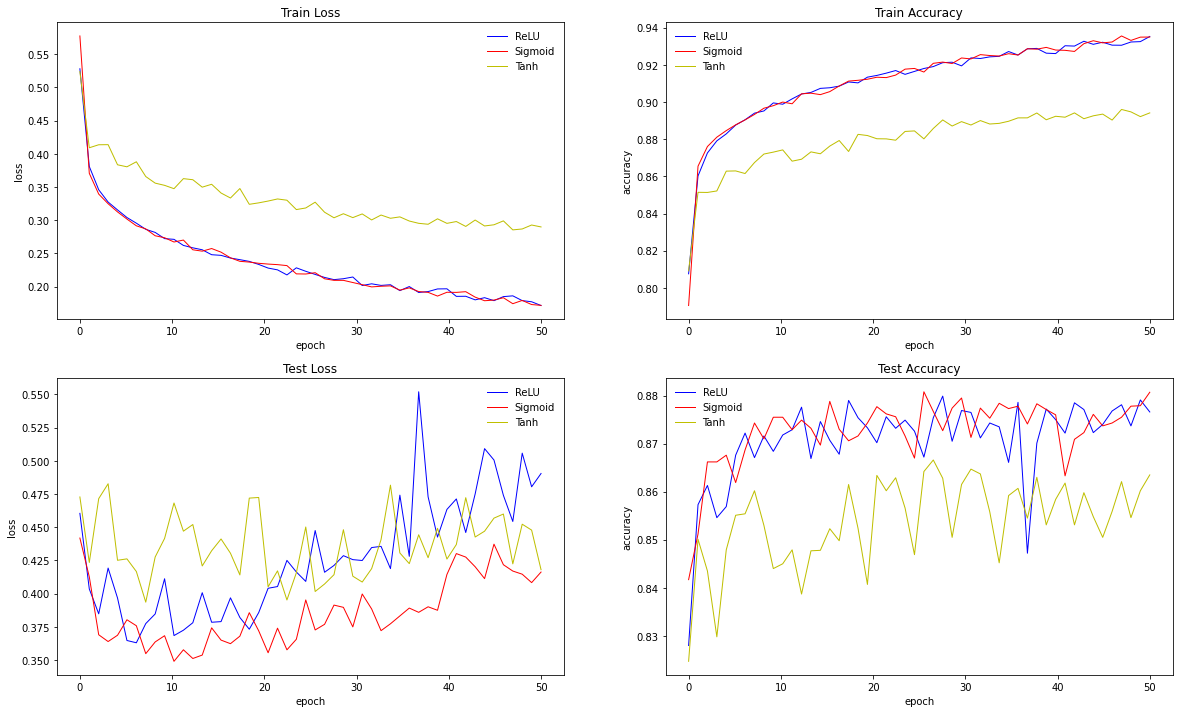

In [14]:
# ÂèÇÊï∞ÈÖçÁΩÆ
device = 'cpu'
input_size = 28 * 28
hidden_size = 256
output_size = 10

batch_size = 256
num_epochs = 50
lr = 0.01

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)

metric_dic = {
    'Train Loss': {},
    'Train Accuracy': {},
    'Test Loss': {},
    'Test Accuracy': {},
}

for activation in [nn.ReLU(), nn.Sigmoid(), nn.Tanh()]:

    train_loss_list = []
    train_acc_list = []
    test_loss_list = []
    test_acc_list = []

    net = TorchNeuron(input_size, hidden_size, output_size, activation=activation)

    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    for epoch in range(num_epochs):
        train_data_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
        test_data_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=True)

        train_loss, train_acc = train_epoch(data_loader=train_data_loader, net=net,
                                            loss_func=loss_func, optimizer=optimizer, device=device)
        test_loss, test_acc = test_epoch(data_loader=test_data_loader, net=net,
                                         loss_func=loss_func, device=device)

        print('lr=%s epoch %d, train_loss %f, test_loss %f, train_acc %f, test_acc %f'
              % (lr, epoch+1, train_loss, test_loss, train_acc, test_acc))

        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        test_loss_list.append(test_loss)
        test_acc_list.append(test_acc)

    metric_dic['Train Loss'][activation._get_name()] = train_loss_list
    metric_dic['Train Accuracy'][activation._get_name()] = train_acc_list
    metric_dic['Test Loss'][activation._get_name()] = test_loss_list
    metric_dic['Test Accuracy'][activation._get_name()] = test_acc_list

plot_by_dict(metric_dic, shape=(2, 2))



##### ÈöêËóèÂ±ÇÂ±ÇÊï∞
‰ΩøÁî®‰∏çÂêåÁöÑÈöêËóèÂ±ÇÂ±ÇÊï∞ÂíåÈöêËóèÂçïÂÖÉ‰∏™Êï∞ÔºåËøõË°åÂØπÊØîÂÆûÈ™åÂπ∂ÂàÜÊûêÂÆûÈ™åÁªìÊûú

TorchNeuron(
  (linear): Sequential(
    (0): FlattenLayaer()
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=10, bias=True)
  )
)
lr=0.01 epoch 1, train_loss 0.521027, test_loss 0.461553, train_acc 0.809333, test_acc 0.835900
lr=0.01 epoch 2, train_loss 0.371831, test_loss 0.430478, train_acc 0.864233, test_acc 0.837700
lr=0.01 epoch 3, train_loss 0.337281, test_loss 0.427192, train_acc 0.876483, test_acc 0.844000
lr=0.01 epoch 4, train_loss 0.322860, test_loss 0.376169, train_acc 0.881483, test_acc 0.861500
lr=0.01 epoch 5, train_loss 0.309747, test_loss 0.370543, train_acc 0.886800, test_acc 0.872400
lr=0.01 epoch 6, train_loss 0.299056, test_loss 0.372532, train_acc 0.889400, test_acc 0.872700
lr=0.01 epoch 7, train_loss 0.288376, test_loss 0.357149, train_acc 0.894300, test_acc 0.876100
lr=0.01 epoch 8, train_loss 0.282418, test_loss 0.380399, train_acc 0.895967, test_acc 0.873000
lr=0.01 epoch 9, train_lo

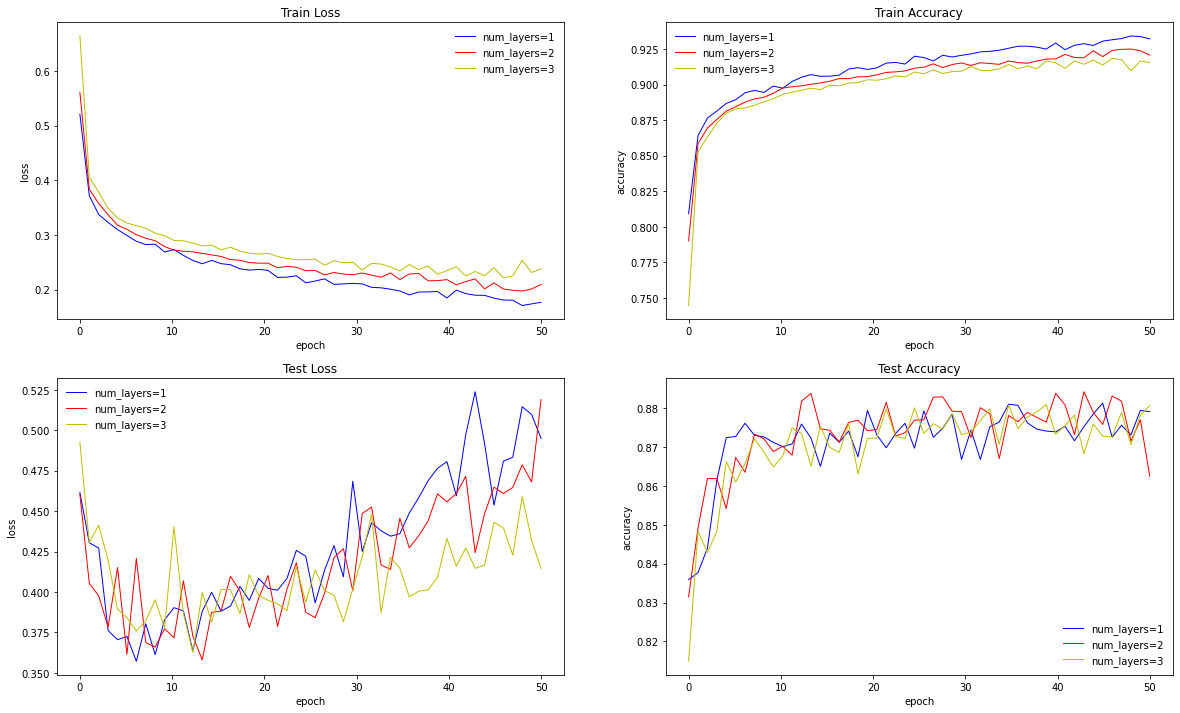

In [31]:
# ÂèÇÊï∞ÈÖçÁΩÆ
device = 'cpu'
input_size = 28 * 28
hidden_size = 256
output_size = 10

batch_size = 256
num_epochs = 50
lr = 0.01

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)

metric_dic = {
    'Train Loss': {},
    'Train Accuracy': {},
    'Test Loss': {},
    'Test Accuracy': {},
}

for num_layers in [1, 2, 3]:

    train_loss_list = []
    train_acc_list = []
    test_loss_list = []
    test_acc_list = []

    net = TorchNeuron(input_size, hidden_size, output_size, num_layers=num_layers)
    print(net)
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    for epoch in range(num_epochs):
        train_data_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
        test_data_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=True)

        train_loss, train_acc = train_epoch(data_loader=train_data_loader, net=net,
                                            loss_func=loss_func, optimizer=optimizer, device=device)
        test_loss, test_acc = test_epoch(data_loader=test_data_loader, net=net,
                                         loss_func=loss_func, device=device)

        print('lr=%s epoch %d, train_loss %f, test_loss %f, train_acc %f, test_acc %f'
              % (lr, epoch+1, train_loss, test_loss, train_acc, test_acc))

        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        test_loss_list.append(test_loss)
        test_acc_list.append(test_acc)

    metric_dic['Train Loss'][f'num_layers={num_layers}'] = train_loss_list
    metric_dic['Train Accuracy'][f'num_layers={num_layers}'] = train_acc_list
    metric_dic['Test Loss'][f'num_layers={num_layers}'] = test_loss_list
    metric_dic['Test Accuracy'][f'num_layers={num_layers}'] = test_acc_list

plot_by_dict(metric_dic, shape=(2, 2))



##### ÈöêËóèÂçïÂÖÉ‰∏™Êï∞
‰ΩøÁî®‰∏çÂêåÁöÑÈöêËóèÂ±ÇÂ±ÇÊï∞ÂíåÈöêËóèÂçïÂÖÉ‰∏™Êï∞ÔºåËøõË°åÂØπÊØîÂÆûÈ™åÂπ∂ÂàÜÊûêÂÆûÈ™åÁªìÊûú

TorchNeuron(
  (linear): Sequential(
    (0): FlattenLayaer()
    (1): Linear(in_features=784, out_features=32, bias=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=10, bias=True)
  )
)
lr=0.01 epoch 1, train_loss 0.580303, test_loss 0.470126, train_acc 0.792683, test_acc 0.835800
lr=0.01 epoch 2, train_loss 0.403906, test_loss 0.410601, train_acc 0.855217, test_acc 0.847000
lr=0.01 epoch 3, train_loss 0.369669, test_loss 0.419431, train_acc 0.866517, test_acc 0.849100
lr=0.01 epoch 4, train_loss 0.347058, test_loss 0.383698, train_acc 0.874433, test_acc 0.862500
lr=0.01 epoch 5, train_loss 0.334963, test_loss 0.400214, train_acc 0.878350, test_acc 0.856300
lr=0.01 epoch 6, train_loss 0.323980, test_loss 0.388322, train_acc 0.883583, test_acc 0.862900
lr=0.01 epoch 7, train_loss 0.321546, test_loss 0.392007, train_acc 0.881217, test_acc 0.858600
lr=0.01 epoch 8, train_loss 0.312150, test_loss 0.389947, train_acc 0.884800, test_acc 0.857100
lr=0.01 epoch 9, train_loss

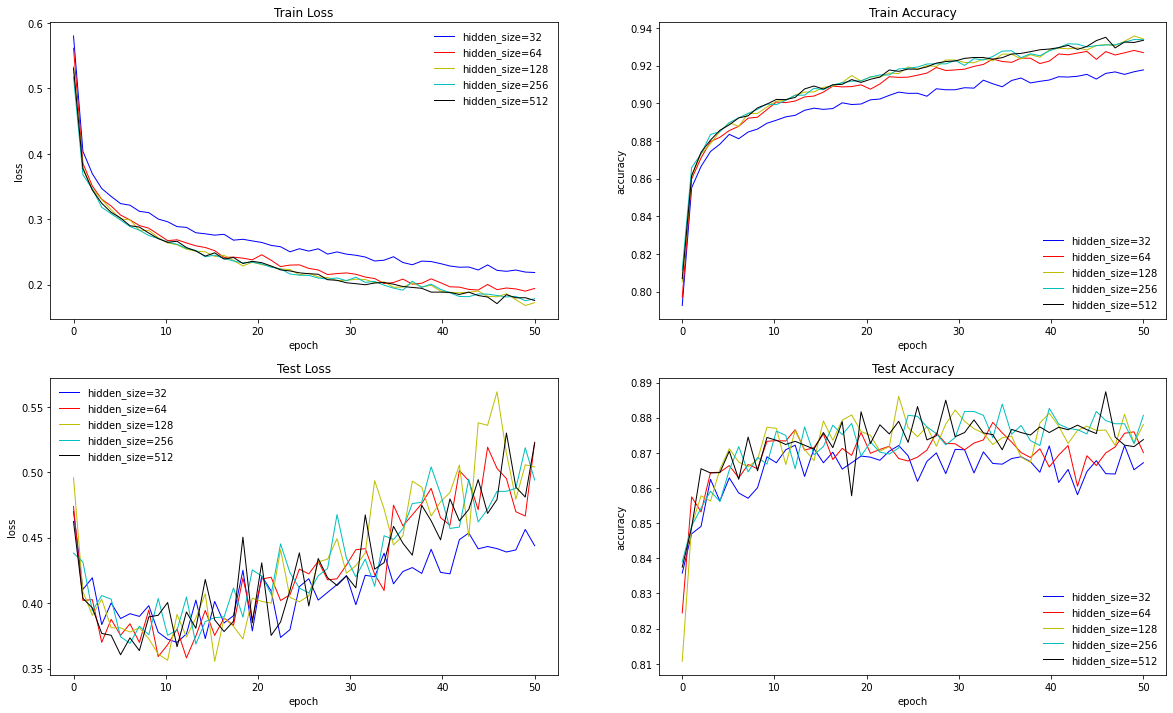

In [32]:
# ÂèÇÊï∞ÈÖçÁΩÆ
device = 'cpu'
input_size = 28 * 28
hidden_size = 256
output_size = 10

batch_size = 256
num_epochs = 50
lr = 0.01

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)

metric_dic = {
    'Train Loss': {},
    'Train Accuracy': {},
    'Test Loss': {},
    'Test Accuracy': {},
}

for hidden_size in [32, 64, 128, 256, 512]:

    train_loss_list = []
    train_acc_list = []
    test_loss_list = []
    test_acc_list = []

    net = TorchNeuron(input_size, hidden_size, output_size)
    print(net)
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    for epoch in range(num_epochs):
        train_data_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
        test_data_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=True)

        train_loss, train_acc = train_epoch(data_loader=train_data_loader, net=net,
                                            loss_func=loss_func, optimizer=optimizer, device=device)
        test_loss, test_acc = test_epoch(data_loader=test_data_loader, net=net,
                                         loss_func=loss_func, device=device)

        print('lr=%s epoch %d, train_loss %f, test_loss %f, train_acc %f, test_acc %f'
              % (lr, epoch+1, train_loss, test_loss, train_acc, test_acc))

        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        test_loss_list.append(test_loss)
        test_acc_list.append(test_acc)

    metric_dic['Train Loss'][f'hidden_size={hidden_size}'] = train_loss_list
    metric_dic['Train Accuracy'][f'hidden_size={hidden_size}'] = train_acc_list
    metric_dic['Test Loss'][f'hidden_size={hidden_size}'] = test_loss_list
    metric_dic['Test Accuracy'][f'hidden_size={hidden_size}'] = test_acc_list

plot_by_dict(metric_dic, shape=(2, 2))



##### ‰∏¢ÂºÉÁéá(dropout)
+ Âú®Â§öÂàÜÁ±ª‰ªªÂä°ÂÆûÈ™å‰∏≠ÂàÜÂà´ÊâãÂä®ÂÆûÁé∞ÂíåÁî®torch.nnÂÆûÁé∞dropout
+ Êé¢Á©∂‰∏çÂêå`‰∏¢ÂºÉÁéá`ÂØπÂÆûÈ™åÁªìÊûúÁöÑÂΩ±Âìç(ÂèØÁî®lossÊõ≤Á∫øËøõË°åÂ±ïÁ§∫)

In [26]:
def dropout(x: torch.Tensor, dropout_prob=0.5):
    """
    ‰∏¢ÂºÉÁéá(Â§±Ê¥ªÁéá)
    ËÆæ‰∏¢ÂºÉÊ¶ÇÁéá‰∏∫p, ÈÇ£‰πàÊúâpÁöÑÊ¶ÇÁéá Hidden_i ‰ºöË¢´Ê∏ÖÈõ∂Ôºå
    Êúâ1‚àípÁöÑÊ¶ÇÁéá Hidden_i ‰ºöÈô§‰ª• 1‚àíp ÂÅöÊãâ‰º∏„ÄÇ
    """
    x = x.float()

    # Ê£ÄÊü•‰∏¢ÂºÉÁéáÊòØÂê¶Âú® 0-1 ‰πãÈó¥
    assert 0 <= dropout_prob <= 1
    keep_prob = 1 - dropout_prob
    if keep_prob == 0:
        return torch.zeros_like(x)

    # ÁîüÊàê mask Áü©Èòµ(ÂêëÈáè)
    mask = (torch.randn(x.shape) < keep_prob).float()

    # ÊåâÁÖß mask ÂØπ x ËøõË°åÂèòÊç¢
    return mask * x / keep_prob


TorchNeuron(
  (linear): Sequential(
    (0): FlattenLayaer()
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.0, inplace=False)
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)
lr=0.01 epoch 1, train_loss 0.529511, test_loss 0.434284, train_acc 0.806200, test_acc 0.838600
lr=0.01 epoch 2, train_loss 0.377324, test_loss 0.446387, train_acc 0.862950, test_acc 0.844600
lr=0.01 epoch 3, train_loss 0.352689, test_loss 0.406702, train_acc 0.870550, test_acc 0.858800
lr=0.01 epoch 4, train_loss 0.329997, test_loss 0.398869, train_acc 0.878400, test_acc 0.858300
lr=0.01 epoch 5, train_loss 0.314999, test_loss 0.379586, train_acc 0.883467, test_acc 0.869200
lr=0.01 epoch 6, train_loss 0.300563, test_loss 0.385892, train_acc 0.887567, test_acc 0.864400
lr=0.01 epoch 7, train_loss 0.292847, test_loss 0.369948, train_acc 0.891067, test_acc 0.875400
lr=0.01 epoch 8, train_loss 0.288393, test_loss 0.372619, train_acc 0.893667, test

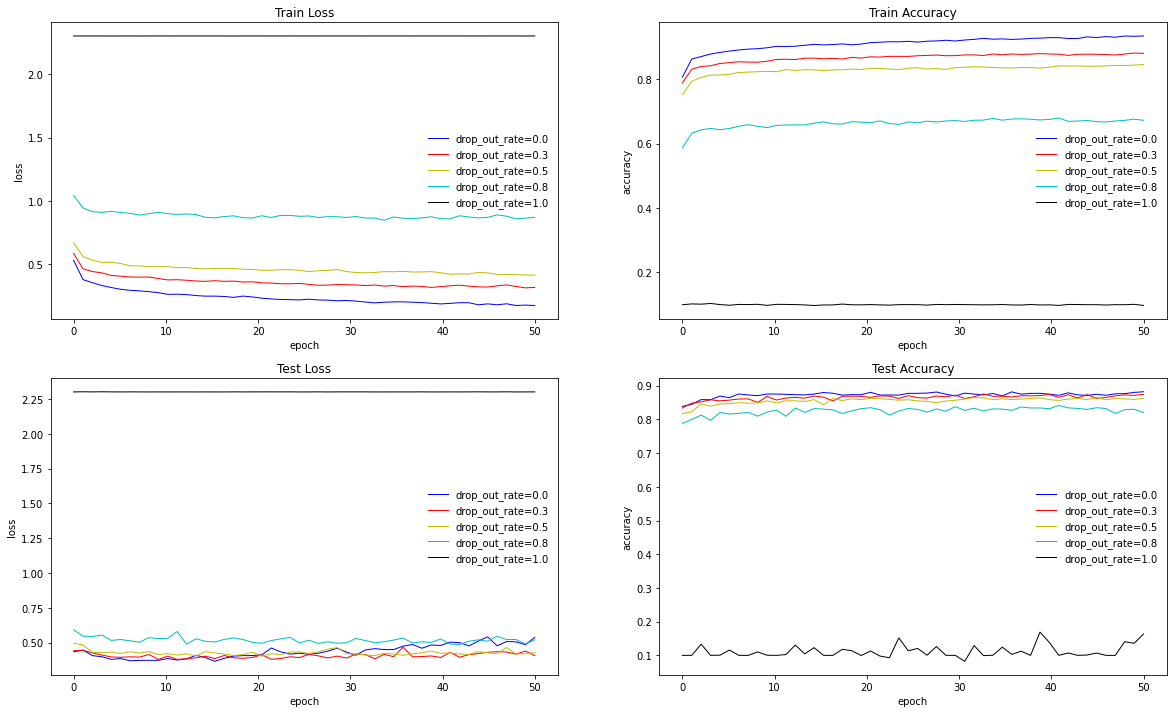

In [34]:
# ÂèÇÊï∞ÈÖçÁΩÆ
device = 'cpu'
input_size = 28 * 28
hidden_size = 128
output_size = 10

batch_size = 256
num_epochs = 50
lr = 0.01

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)

metric_dic = {
    'Train Loss': {},
    'Train Accuracy': {},
    'Test Loss': {},
    'Test Accuracy': {},
}

for drop_out_rate in [0.0, 0.3, 0.5, 0.8, 1.0]:

    train_loss_list = []
    train_acc_list = []
    test_loss_list = []
    test_acc_list = []

    net = TorchNeuron(input_size, hidden_size, output_size, drop_out_rate=drop_out_rate)
    print(net)
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    for epoch in range(num_epochs):
        train_data_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
        test_data_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=True)

        train_loss, train_acc = train_epoch(data_loader=train_data_loader, net=net,
                                            loss_func=loss_func, optimizer=optimizer, device=device)
        test_loss, test_acc = test_epoch(data_loader=test_data_loader, net=net,
                                         loss_func=loss_func, device=device)

        print('lr=%s epoch %d, train_loss %f, test_loss %f, train_acc %f, test_acc %f'
              % (lr, epoch+1, train_loss, test_loss, train_acc, test_acc))

        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        test_loss_list.append(test_loss)
        test_acc_list.append(test_acc)

    metric_dic['Train Loss'][f'drop_out_rate={drop_out_rate}'] = train_loss_list
    metric_dic['Train Accuracy'][f'drop_out_rate={drop_out_rate}'] = train_acc_list
    metric_dic['Test Loss'][f'drop_out_rate={drop_out_rate}'] = test_loss_list
    metric_dic['Test Accuracy'][f'drop_out_rate={drop_out_rate}'] = test_acc_list

plot_by_dict(metric_dic, shape=(2, 2))

##### Âú®Â§öÂàÜÁ±ª‰ªªÂä°ÂÆûÈ™å‰∏≠ÂàÜÂà´ÊâãÂä®ÂÆûÁé∞ÂíåÁî®torch.nnÂÆûÁé∞ùë≥ùüêÊ≠£ÂàôÂåñ
Êé¢Á©∂ÊÉ©ÁΩöÈ°πÁöÑÊùÉÈáçÂØπÂÆûÈ™åÁªìÊûúÁöÑÂΩ±Âìç(ÂèØÁî®lossÊõ≤Á∫øËøõË°åÂ±ïÁ§∫)

TorchNeuron(
  (linear): Sequential(
    (0): FlattenLayaer()
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0, inplace=False)
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)
lr=0.01 epoch 1, train_loss 0.524892, test_loss 0.435192, train_acc 0.806333, test_acc 0.853000
lr=0.01 epoch 2, train_loss 0.378659, test_loss 0.395001, train_acc 0.862900, test_acc 0.859100
lr=0.01 epoch 3, train_loss 0.352307, test_loss 0.413986, train_acc 0.870467, test_acc 0.851400
lr=0.01 epoch 4, train_loss 0.325388, test_loss 0.362763, train_acc 0.881667, test_acc 0.872200
lr=0.01 epoch 5, train_loss 0.315034, test_loss 0.372450, train_acc 0.884983, test_acc 0.863200
lr=0.01 epoch 6, train_loss 0.306408, test_loss 0.360257, train_acc 0.887250, test_acc 0.872600
lr=0.01 epoch 7, train_loss 0.289946, test_loss 0.389846, train_acc 0.893817, test_acc 0.860000
lr=0.01 epoch 8, train_loss 0.284421, test_loss 0.382306, train_acc 0.895167, test_a

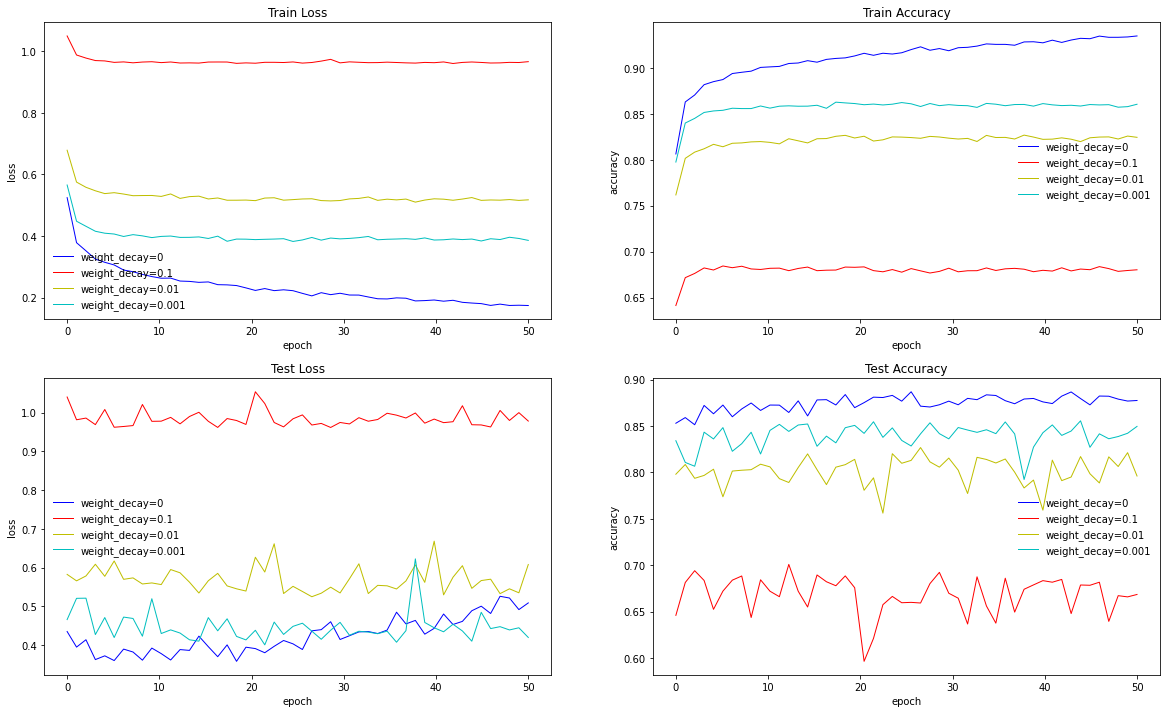

In [35]:
# ÂèÇÊï∞ÈÖçÁΩÆ
device = 'cpu'
input_size = 28 * 28
hidden_size = 128
output_size = 10

batch_size = 256
num_epochs = 50
lr = 0.01

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)

metric_dic = {
    'Train Loss': {},
    'Train Accuracy': {},
    'Test Loss': {},
    'Test Accuracy': {},
}

for weight_decay in [0, 0.1, 0.01, 0.001]:

    train_loss_list = []
    train_acc_list = []
    test_loss_list = []
    test_acc_list = []

    net = TorchNeuron(input_size, hidden_size, output_size)
    print(net)
    optimizer = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=weight_decay)
    for epoch in range(num_epochs):
        train_data_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
        test_data_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=True)

        train_loss, train_acc = train_epoch(data_loader=train_data_loader, net=net,
                                            loss_func=loss_func, optimizer=optimizer, device=device)
        test_loss, test_acc = test_epoch(data_loader=test_data_loader, net=net,
                                         loss_func=loss_func, device=device)

        print('lr=%s epoch %d, train_loss %f, test_loss %f, train_acc %f, test_acc %f'
              % (lr, epoch+1, train_loss, test_loss, train_acc, test_acc))

        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        test_loss_list.append(test_loss)
        test_acc_list.append(test_acc)

    metric_dic['Train Loss'][f'weight_decay={weight_decay}'] = train_loss_list
    metric_dic['Train Accuracy'][f'weight_decay={weight_decay}'] = train_acc_list
    metric_dic['Test Loss'][f'weight_decay={weight_decay}'] = test_loss_list
    metric_dic['Test Accuracy'][f'weight_decay={weight_decay}'] = test_acc_list

plot_by_dict(metric_dic, shape=(2, 2))

##### ÈááÁî®10Êäò‰∫§ÂèâÈ™åËØÅËØÑ‰º∞ÂÆûÈ™åÁªìÊûú
Ë¶ÅÊ±ÇÈô§‰∫ÜÊúÄÁªàÁªìÊûúÂ§ñËøòÈúÄ‰ª•Ë°®Ê†ºÁöÑÂΩ¢ÂºèÂ±ïÁ§∫ÊØèÊäòÁöÑÂÆûÈ™åÁªìÊûú

In [29]:
import torch
from sklearn.model_selection import KFold


def train(train_x, train_y, test_x, test_y):
    net = TorchNeuron(input_size, hidden_size, output_size)
    loss_func = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=lr)

    train_loss_list = []
    train_acc_list = []
    test_loss_list = []
    test_acc_list = []

    for epoch in range(num_epochs):

        train_set = Data.TensorDataset(train_x, train_y)
        test_set = Data.TensorDataset(test_x, test_y)

        train_data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
        test_data_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)

        train_loss, train_acc = train_epoch(data_loader=train_data_loader, net=net,
                                            loss_func=loss_func, optimizer=optimizer, device=device)
        test_loss, test_acc = test_epoch(data_loader=test_data_loader, net=net,
                                         loss_func=loss_func, device=device)

        print('epoch %d, train_loss %f, test_loss %f, train_acc %f, test_acc %f'
              % (epoch+1, train_loss, test_loss, train_acc, test_acc))

        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        test_loss_list.append(test_loss)
        test_acc_list.append(test_acc)

    return train_loss_list, train_acc_list, test_loss_list, test_acc_list

# ÂèÇÊï∞ÈÖçÁΩÆ
device = 'cpu'
input_size = 28 * 28
hidden_size = 128
output_size = 10

batch_size = 256
num_epochs = 20
lr = 0.01

X = torch.cat([mnist_train.data, mnist_test.data], dim=0)
y = torch.cat([mnist_train.targets, mnist_test.targets], dim=0)
print(X.shape, y.shape)

indices = np.arange(0, X.shape[0])
kf = KFold(n_splits=10)

kf_train_loss, kf_train_acc, kf_test_loss, kf_test_acc = [], [], [], []
for train_index, test_index in kf.split(indices):
    train_index = torch.LongTensor(train_index)
    test_index = torch.LongTensor(test_index)

    train_x = torch.index_select(X, dim=0, index=train_index)
    train_y = torch.index_select(y, dim=0, index=train_index)
    test_x = torch.index_select(X, dim=0, index=test_index)
    test_y = torch.index_select(y, dim=0, index=test_index)

    # ËÆ≠ÁªÉ
    train_loss_list, train_acc_list, \
    test_loss_list, test_acc_list = train(train_x, train_y, test_x, test_y)

    kf_train_loss.append(train_loss_list)
    kf_train_acc.append(train_acc_list)
    kf_test_loss.append(test_loss_list)
    kf_test_acc.append(test_acc_list)


torch.Size([70000, 28, 28]) torch.Size([70000])
epoch 1, train_loss 3.625947, test_loss 1.756168, train_acc 0.291571, test_acc 0.334000
epoch 2, train_loss 1.750988, test_loss 1.662811, train_acc 0.297587, test_acc 0.347000
epoch 3, train_loss 1.621198, test_loss 1.583366, train_acc 0.349714, test_acc 0.373000
epoch 4, train_loss 1.626835, test_loss 1.610424, train_acc 0.349683, test_acc 0.374143
epoch 5, train_loss 1.638005, test_loss 2.345621, train_acc 0.345825, test_acc 0.291714
epoch 6, train_loss 1.733139, test_loss 1.675032, train_acc 0.339111, test_acc 0.311429
epoch 7, train_loss 1.614935, test_loss 1.694614, train_acc 0.354048, test_acc 0.357714
epoch 8, train_loss 1.627564, test_loss 1.682208, train_acc 0.357762, test_acc 0.318143
epoch 9, train_loss 1.650702, test_loss 1.749844, train_acc 0.357810, test_acc 0.308286
epoch 10, train_loss 1.610449, test_loss 1.903641, train_acc 0.356857, test_acc 0.274429
epoch 11, train_loss 1.640706, test_loss 1.757889, train_acc 0.351762, 

In [36]:
kf_train_loss_np = np.array(kf_train_loss)
kf_train_acc_np = np.array(kf_train_acc)

kf_test_loss_np = np.array(kf_test_loss)
kf_test_acc_np = np.array(kf_test_acc)

# print(kf_test_loss_np.min(axis=1))
# print(kf_test_loss_np.mean(axis=1))

# print(kf_test_acc_np.max(axis=1))

print('Average Loss    :', list(round(i, ndigits=3) for i in kf_test_loss_np.mean(axis=1)))
print('Average Accuracy:', list(round(i, ndigits=3) for i in kf_test_acc_np.mean(axis=1)))

Average Loss    : [1.746, 1.481, 2.196, 1.904, 1.887, 1.366, 1.518, 1.851, 1.267, 1.732]
Average Accuracy: [0.34, 0.43, 0.168, 0.263, 0.267, 0.443, 0.412, 0.287, 0.484, 0.34]
